Hello, the flow of the work for this paper will be as follows:
1. read the data
2. scale the data
3. visualise the data
4. split the data
5. get feature importance (permutation)
6. visualize the best N imported features based on 50 runs
7. try from (1, 5, 10, 50) best features
    10, 20, 30, 40, 50 Freq. Random
8. the split should be (70, 30)
9. try up to 6 different classification models (RF, XGB, SVM, LR, KNNs, MD)
10. get the error bars and make comparisons

In [1]:
import pandas as pd # for importing data into data frame format
import seaborn as sns # For drawing useful graphs, such as bar graphs
from matplotlib.pyplot import show # This displays graphs once they have been created
import numpy as np
import matplotlib.pyplot as plt
from source.roc import draw_roc 


### 1. read the data

In [2]:
df = pd.read_excel('/users/hussein/source/apple_classification/data/Detect-GS.xlsx')

In [3]:
df.shape

(503, 2078)

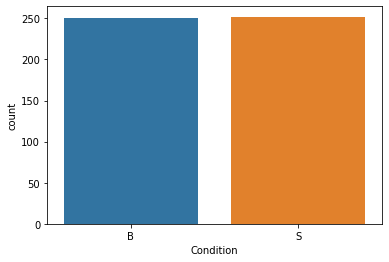

In [4]:
df['Condition'] = df['Condition'].str.upper()
ax = sns.countplot(x="Condition",data=df)


#### getting x, and y

In [5]:
df_input= df.drop(['Sample', 'Condition', 'Age', 'Source'], axis=1)
df_input


,11995.490,11991.630,11987.780,11983.920,11980.060,11976.210,11972.350,11968.490,11964.640,11960.780,...,4034.497,4030.640,4026.783,4022.926,4019.069,4015.211,4011.354,4007.497,4003.640,3999.783
0,-0.113748,-0.113815,-0.114197,-0.114321,-0.114032,-0.113495,-0.113074,-0.113266,-0.114108,-0.114498,...,0.845574,0.850478,0.849688,0.844572,0.844248,0.849826,0.854541,0.849297,0.836767,0.830801
1,-0.161664,-0.161498,-0.161212,-0.161013,-0.160861,-0.160329,-0.159698,-0.159639,-0.160184,-0.160504,...,0.428670,0.431408,0.433148,0.431059,0.426104,0.422003,0.420373,0.419252,0.419077,0.421115
2,-0.139064,-0.138784,-0.138928,-0.138786,-0.138244,-0.137692,-0.137664,-0.138295,-0.139098,-0.139391,...,0.809659,0.808975,0.806819,0.805404,0.807540,0.810868,0.814169,0.812831,0.799328,0.783305
3,-0.143663,-0.143526,-0.143718,-0.143459,-0.142628,-0.142030,-0.142162,-0.142754,-0.143336,-0.143301,...,0.682872,0.683971,0.688426,0.692536,0.690982,0.685393,0.679534,0.677676,0.682072,0.689607
4,-0.166998,-0.166739,-0.166921,-0.166882,-0.166638,-0.166418,-0.166405,-0.166787,-0.167322,-0.167319,...,0.520031,0.521815,0.520814,0.518175,0.518827,0.523526,0.529133,0.532134,0.531992,0.529879
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
498,-0.005843,-0.005746,-0.005965,-0.006040,-0.005732,-0.005905,-0.006496,-0.006305,-0.005184,-0.004249,...,0.823532,0.825095,0.831351,0.830832,0.824308,0.817157,0.814575,0.815848,0.817096,0.823652
499,-0.010555,-0.009949,-0.010038,-0.010154,-0.010212,-0.010717,-0.010729,-0.009878,-0.009303,-0.009316,...,0.647229,0.642954,0.642807,0.646312,0.650215,0.651266,0.648941,0.648903,0.655380,0.662244
500,-0.054230,-0.054836,-0.055471,-0.055616,-0.055853,-0.056578,-0.056854,-0.055983,-0.054825,-0.054404,...,0.403613,0.404402,0.408775,0.410042,0.406809,0.405787,0.406463,0.405325,0.406469,0.410188
501,0.052804,0.052833,0.053037,0.053045,0.052818,0.052379,0.052130,0.052272,0.052694,0.053489,...,1.357465,1.369164,1.395378,1.412128,1.423115,1.429553,1.404126,1.366339,1.349845,1.325851


In [6]:
y = df['Condition']
y = y.map({'S': 1, 'B': 0})

### 2.scale the data

In [7]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
input_scaled = scaler.fit_transform(df_input)

df_input_scaled = pd.DataFrame(input_scaled, columns = df_input.columns)
# df_input_scaled['class'] = df['Condition']

df_input_scaled

/users/hussein/source/apple_classification/appleVer/lib/python3.8/site-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['float', 'int']. An error will be raised in 1.2.
  warnings.warn(
/users/hussein/source/apple_classification/appleVer/lib/python3.8/site-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['float', 'int']. An error will be raised in 1.2.
  warnings.warn(


,11995.490,11991.630,11987.780,11983.920,11980.060,11976.210,11972.350,11968.490,11964.640,11960.780,...,4034.497,4030.640,4026.783,4022.926,4019.069,4015.211,4011.354,4007.497,4003.640,3999.783
0,-0.808493,-0.807557,-0.808127,-0.809277,-0.810315,-0.809986,-0.808822,-0.810160,-0.814925,-0.817989,...,-0.408186,-0.390167,-0.395094,-0.416035,-0.416191,-0.393794,-0.376064,-0.394183,-0.438806,-0.461273
1,-1.045204,-1.042834,-1.040064,-1.039891,-1.041951,-1.041888,-1.039677,-1.039588,-1.042774,-1.045571,...,-1.982225,-1.971150,-1.966837,-1.972678,-1.980933,-1.986981,-1.992071,-1.999241,-2.010441,-2.015706
2,-0.933558,-0.930759,-0.930131,-0.930111,-0.930078,-0.929796,-0.930579,-0.933991,-0.938503,-0.941131,...,-0.543787,-0.546740,-0.556853,-0.563482,-0.553554,-0.538869,-0.526329,-0.530286,-0.579681,-0.641481
3,-0.956279,-0.954154,-0.953762,-0.953193,-0.951764,-0.951278,-0.952847,-0.956050,-0.959460,-0.960475,...,-1.022473,-1.018331,-1.003590,-0.988366,-0.989729,-1.006131,-1.027455,-1.034726,-1.020874,-0.996992
4,-1.071554,-1.068693,-1.068226,-1.068877,-1.070526,-1.072038,-1.072885,-1.074952,-1.078072,-1.079284,...,-1.637289,-1.630079,-1.636046,-1.644734,-1.633950,-1.608915,-1.587258,-1.577930,-1.585577,-1.603032
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
498,-0.275430,-0.274320,-0.274200,-0.274479,-0.274608,-0.277242,-0.281107,-0.280976,-0.276278,-0.272611,...,-0.491406,-0.485925,-0.464286,-0.467758,-0.490807,-0.515450,-0.524820,-0.519023,-0.512824,-0.488398
499,-0.298707,-0.295062,-0.294296,-0.294798,-0.296765,-0.301067,-0.302066,-0.298652,-0.296644,-0.297677,...,-1.157046,-1.173071,-1.175726,-1.162370,-1.142283,-1.133218,-1.141321,-1.142113,-1.121310,-1.100813
500,-0.514468,-0.516540,-0.518424,-0.519333,-0.522529,-0.528154,-0.530454,-0.526756,-0.521762,-0.520717,...,-2.076827,-2.073034,-2.058804,-2.051791,-2.053137,-2.047367,-2.043846,-2.051221,-2.057879,-2.057166
501,0.014295,0.014717,0.016864,0.017340,0.015010,0.011359,0.009173,0.008830,0.009937,0.013005,...,1.524477,1.566631,1.663975,1.720487,1.749993,1.765076,1.669538,1.535575,1.491738,1.417050


### 4. split the data

In [8]:
from sklearn.model_selection import train_test_split

Xtrain, Xtest, Ytrain, Ytest = train_test_split( df_input_scaled, y, test_size = 0.4, random_state=3, stratify=y) # train and valid sets

In [9]:
print(Xtrain.shape)
print(Xtest.shape)

(301, 2074)
(202, 2074)


In [12]:
%store -r featOrdered
%store -r sorted_idx

In [13]:
print(featOrdered)

[7143.296 11625.21 11594.36 8462.415 5488.613 10329.24 6028.603 8736.267
 6005.46 9526.967 8902.121 4196.494 5338.187 8076.708 5897.462 8674.554
 11613.64 11270.36 11204.79 5392.186 6989.014 10336.95 10533.66 8805.694
 6487.594 11571.21 8350.56 11968.49 8107.564 11505.64 9299.399 8855.836
 5322.759 8423.844 11312.79 7297.579 4323.777 7571.431 8269.562 10919.37
 10417.95 10684.09 7837.569 5793.321 10244.38 9712.105 6221.457 9353.398
 5376.758 11941.49 5739.322 4940.909 11089.08 5766.322 4802.054 10884.66
 8628.269 11289.65 7320.722 6248.456 9021.69 10294.52 10853.8 11609.79
 11636.78 7000.585 4381.633 8273.418 11158.51 5527.184 11293.5 8778.694
 4235.064 11139.22 11856.64 8936.835 7282.151 8392.987 11829.64 10394.81
 10776.66 4296.778 8655.269 8697.696 10788.23 11779.5 4393.205 11945.35
 6032.46 7475.004 11254.93 10402.52 7451.862 10375.52 9808.532 8608.983
 11497.93 7286.008 11073.65 7394.006 5465.47 4620.771 11814.21 6375.739
 7428.72 8504.843 11501.79 10591.52 4763.483 5484.756 8574.

### ML with diffrint features as an input

In [28]:
number_features = [3, 5, 10, 20, 50] # define the number features. 
# number_features = [3, 5] # define the number features

#### define the hyper parameters

In [29]:
from sklearn.neural_network import MLPClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier
from numpy import random as np_random

In [87]:
solvers = ['newton-cg', 'liblinear']
penalty = ['l2']
c_values = [1000, 100, 10, 1.0, 0.1, 0.01, 0.001]
lr = LogisticRegression()
lr_par = dict(solver=solvers,penalty=penalty,C=c_values)

##############################
C_range = np.logspace(-1, 10, 20) # define a set of values for the parameter C
gamma_range = np.logspace(-9, 3, 20) # define a set of values for the parameter gamma

svm = SVC(kernel="rbf")
svm_par = dict(gamma=gamma_range, C=C_range)

#########################

n_estimators = range(10, 800, 50)
#max_features = ['sqrt', 'log2']

rf = RandomForestClassifier(random_state=1)
rf_par = dict(n_estimators=n_estimators)
#######################
# https://www.kaggle.com/code/tilii7/hyperparameter-grid-search-with-xgboost/notebook
xgb_par = {
        'min_child_weight': [1, 5, 10],
        'gamma': [0.5, 1, 1.5, 2, 5, 9],
        'subsample': [0.6, 0.8, 1.0],
        'colsample_bytree': [0.6, 0.8, 1.0],
        'max_depth': [3, 4, 5, 8]
        }
xgb = XGBClassifier()
##################################
n_neighbors = range(1, 30, 2)
weights = ['uniform', 'distance']
metric = ['euclidean', 'manhattan', 'minkowski']

knns = KNeighborsClassifier()
knns_par = dict(n_neighbors=n_neighbors,weights=weights,metric=metric)
################
anns = MLPClassifier(max_iter=3000, random_state=1, activation = 'relu', solver = 'sgd')
anns_par = {
    'hidden_layer_sizes': [(3,3),(5,5),(8,3)],
#     'activation': ['relu'],
    'solver': ['sgd', 'adam'],
    'alpha': [0.0001, 0.001,0.01,0.1, 0.05, 0.005 , 0.005, 0.00005],
#     'learning_rate': ['constant','adaptive'],
}
################


# models = [[lr, 'lr', 30], [svm, 'svm', 10], [rf, 'rf', 30], [xgb, 'xgb', 30], [knns, 'knns', 30], [anns, 'anns', 30]]
# par = [lr_par, svm_par, rf_par, xgb_par, knns_par, anns_par]

models = [[lr, 'lr', 30], [xgb, 'xgb', 2]]
par = [lr_par, xgb_par]

# models = [[xgb, 'xgb'], [anns, 'anns']]
# par = [xgb_par, anns_par]


In [88]:
### splits
# splits = [0.4]



#### train and test

In [89]:
from source.ml_acc import get_accuracy_ml

In [ ]:
num_ml_tools = len(par)
ml_dicts = {}

for m, par in zip(models, par):
    # for s in splits:
    #     X_train, X_test, y_train, y_test = train_test_split(df, y, test_size= s, random_state=1, stratify = y, shuffle = True)
    key0 = str(m[1])
    ml_dicts[key0] = {}
    for f in number_features:
        print(f)
        print(featOrdered[f])
                
        xtr =  Xtrain[featOrdered[-f:]]
        xte =  Xtest[featOrdered[-f:]]
        results = get_accuracy_ml (m[0], m[2], par, np.array(xtr), np.array(Ytrain), np.array(xte), np.array(Ytest)) # to get the accuracies for the ml model

        key = str(m[1])+","+str((f))
        ml_dicts[key0][key] = {}

        ml_dicts[key0][key]['tot_acc'] = results[0]
        ml_dicts[key0][key]['jack_train'] = results[1]
        ml_dicts[key0][key]['jack_test'] = results[2]

3
8462.415


/users/hussein/source/apple_classification/appleVer/lib/python3.8/site-packages/sklearn/model_selection/_search.py:292: UserWarning: The total space of parameters 14 is smaller than n_iter=30. Running 14 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(
/users/hussein/source/apple_classification/appleVer/lib/python3.8/site-packages/sklearn/model_selection/_search.py:292: UserWarning: The total space of parameters 14 is smaller than n_iter=30. Running 14 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(
/users/hussein/source/apple_classification/appleVer/lib/python3.8/site-packages/sklearn/model_selection/_search.py:292: UserWarning: The total space of parameters 14 is smaller than n_iter=30. Running 14 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(
/users/hussein/source/apple_classification/appleVer/lib/python3.8/site-packages/sklearn/model_selection/_search.py:292: UserWarning: The total space of parameters 14 is sma

5
10329.24


/users/hussein/source/apple_classification/appleVer/lib/python3.8/site-packages/sklearn/model_selection/_search.py:292: UserWarning: The total space of parameters 14 is smaller than n_iter=30. Running 14 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(
/users/hussein/source/apple_classification/appleVer/lib/python3.8/site-packages/sklearn/model_selection/_search.py:292: UserWarning: The total space of parameters 14 is smaller than n_iter=30. Running 14 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(
/users/hussein/source/apple_classification/appleVer/lib/python3.8/site-packages/sklearn/model_selection/_search.py:292: UserWarning: The total space of parameters 14 is smaller than n_iter=30. Running 14 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(
/users/hussein/source/apple_classification/appleVer/lib/python3.8/site-packages/sklearn/model_selection/_search.py:292: UserWarning: The total space of parameters 14 is sma

10
8902.121


/users/hussein/source/apple_classification/appleVer/lib/python3.8/site-packages/sklearn/model_selection/_search.py:292: UserWarning: The total space of parameters 14 is smaller than n_iter=30. Running 14 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(
/users/hussein/source/apple_classification/appleVer/lib/python3.8/site-packages/sklearn/model_selection/_search.py:292: UserWarning: The total space of parameters 14 is smaller than n_iter=30. Running 14 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(
/users/hussein/source/apple_classification/appleVer/lib/python3.8/site-packages/sklearn/model_selection/_search.py:292: UserWarning: The total space of parameters 14 is smaller than n_iter=30. Running 14 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(
/users/hussein/source/apple_classification/appleVer/lib/python3.8/site-packages/sklearn/model_selection/_search.py:292: UserWarning: The total space of parameters 14 is sma

20
6989.014


/users/hussein/source/apple_classification/appleVer/lib/python3.8/site-packages/sklearn/model_selection/_search.py:292: UserWarning: The total space of parameters 14 is smaller than n_iter=30. Running 14 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(
/users/hussein/source/apple_classification/appleVer/lib/python3.8/site-packages/sklearn/model_selection/_search.py:292: UserWarning: The total space of parameters 14 is smaller than n_iter=30. Running 14 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(
/users/hussein/source/apple_classification/appleVer/lib/python3.8/site-packages/sklearn/model_selection/_search.py:292: UserWarning: The total space of parameters 14 is smaller than n_iter=30. Running 14 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(
/users/hussein/source/apple_classification/appleVer/lib/python3.8/site-packages/sklearn/model_selection/_search.py:292: UserWarning: The total space of parameters 14 is sma

50
5739.322


/users/hussein/source/apple_classification/appleVer/lib/python3.8/site-packages/sklearn/model_selection/_search.py:292: UserWarning: The total space of parameters 14 is smaller than n_iter=30. Running 14 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(
/users/hussein/source/apple_classification/appleVer/lib/python3.8/site-packages/sklearn/model_selection/_search.py:292: UserWarning: The total space of parameters 14 is smaller than n_iter=30. Running 14 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(
/users/hussein/source/apple_classification/appleVer/lib/python3.8/site-packages/sklearn/model_selection/_search.py:292: UserWarning: The total space of parameters 14 is smaller than n_iter=30. Running 14 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(
/users/hussein/source/apple_classification/appleVer/lib/python3.8/site-packages/sklearn/model_selection/_search.py:292: UserWarning: The total space of parameters 14 is sma

3
8462.415
5
10329.24
10
8902.121
20
6989.014
50
5739.322


In [ ]:
print(ml_dicts.keys())

In [ ]:
ml_dicts_1000 = ml_dicts

%store ml_dicts_1000


In [ ]:
%store -r ml_dicts_1000
ml_dicts = ml_dicts_1000

### SD with acc

In [ ]:
from source.calculate_jack import jack_SD # importing the baseline code from source.basline file

In [ ]:
arr_all = []
for m, d in zip (models, ml_dicts.keys()):
    acc_arr = [] 
    sd_arr = [] 

    # print(ml_dicts[d])
    for key in ml_dicts[d].keys():
        acc_arr.append(ml_dicts[d][key][ 'tot_acc' ]) # append total accuracy to an array
        sd_train = jack_SD(np.zeros( len(ml_dicts[d][key][ 'jack_train' ]) ), ml_dicts[d][key][ 'jack_train' ])[0]
        sd_test = jack_SD(np.zeros( len(ml_dicts[d][key][ 'jack_test' ]) ), ml_dicts[d][key][ 'jack_test' ])[0]
        sd = np.sqrt( np.array((sd_train**2)) + np.array((sd_test**2)))
        sd_arr.append(sd) # append sd_arr to an array
    arr_all.append([ list(ml_dicts[d].keys()), acc_arr, sd_arr])    

In [ ]:
print(arr_all)

In [ ]:
#### graph

In [ ]:
colors = ['blue', 'purple', 'green', 'orange', 'red', 'brown']
plt.figure(figsize=(15, 7))
plt.title( "Precision  for different features with the SD", fontweight ='bold', fontsize =12)
plt.xlabel("Features", fontweight ='bold', fontsize =12)
plt.ylabel("Precision", fontweight ='bold', fontsize =12)

count = 0
n = len(colors)-1

space = []
tickFeat = []

for result, model, color in zip(arr_all, models, colors):
    a = np.linspace(n*count, n*(1+count)-2,5)
    print(a)
    space.extend(a)
    tickFeat.extend(result[0])
    plt.errorbar( a, result[1], result[2], fmt='o', label =model[1], color = color)
    count += 1

plt.xticks(space, tickFeat, rotation = 'vertical',  fontsize =12)
plt.ylim(.2, 1)
plt.legend()

plt.show()

#### relative perfromance

In [ ]:
arr_diff_all = []

for m, m_key in zip (models, ml_dicts.keys()):
    acc_diff_arr = [] 
    sd_diff_arr = [] 
    if m_key != "lr":
        for f_key in ml_dicts[m_key].keys():
            value = f_key.split(',')
            acc_diff_arr.append( ml_dicts[m_key][f_key][ 'tot_acc' ] - ml_dicts['lr']['lr,'+value[1]][ 'tot_acc' ]  )

            sd_train = jack_SD( ml_dicts['lr']['lr,'+value[1]][ 'jack_train' ], ml_dicts[m_key][f_key]['jack_train'] )[0]
            sd_test = jack_SD(  ml_dicts['lr']['lr,'+value[1]][ 'jack_test' ],  ml_dicts[m_key][f_key]['jack_test']   )[0]
            
            sd = np.sqrt( np.array((sd_train**2)) + np.array((sd_test**2)))
            sd_diff_arr.append(sd) # append sd_arr to an array
        arr_diff_all.append([ list(ml_dicts[m_key].keys()), acc_diff_arr, sd_diff_arr])  

In [ ]:
print(arr_diff_all)

In [ ]:
colors = ['purple', 'green', 'orange', 'red', 'brown']
plt.figure(figsize=(15, 7))
plt.title( "Precision  differences for ML methods versus LR for feature setsD", fontweight ='bold', fontsize =12)
plt.xlabel("Features", fontweight ='bold', fontsize =12)
plt.ylabel("Precision  difference", fontweight ='bold', fontsize =12)
count = 0
n = len(colors)-1
space = []
tickFeat = []

for result, model, color in zip(arr_diff_all, models[1:], colors):
    a = np.linspace(n*count, n*(1+count)-2,5)
    space.extend(a)
    tickFeat.extend(result[0])
    plt.errorbar( a, result[1], result[2], fmt='o', label =model[1], color = color)
    count += 1
    
plt.plot(np.array(space), np.zeros(5*5), color = 'Black')        
plt.xticks(space, tickFeat, rotation = 'vertical',  fontsize =12)
plt.ylim(-.5, 1)
plt.legend()
plt.show()

### now what is next
1. fix the feature key, just make it the num of features
2. change the training from .4 to .3 (across all notebooks)
3. increase the hyperparameters for RF
4. what we can try is the following:
    1. split the data 70, 30
    2. chose an equally spaced features on the following (10, 20, 50, 100) using (how many methods)
    3. the testing has to happen on a validation set
    4. select the optimal number of feature set feature
    5. perform feature importance, and re-order the features according to their importance (consider [FRE](https://scikit-learn.org/stable/auto_examples/feature_selection/plot_rfe_with_cross_validation.html#sphx-glr-auto-examples-feature-selection-plot-rfe-with-cross-validation-py))
    6. then perform different ml methods with different number of features
    7. calculate the precision, and the relative precision, where the base model is LR